# Sample analysis for screen data

In [1]:
%matplotlib widget
# May need to be changed to %matplotlib inline if jupyter-matplotlib is not available:
# https://github.com/matplotlib/jupyter-matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import niimpy
from niimpy import ALL

In [3]:
db = niimpy.open('data.sqlite')

In [4]:
db.conn.execute("select distinct user, device from AwareScreen").fetchall()

[('xJByY57Ph7pU', 'iWpmbvTcAsNv')]

In [5]:
db.conn.execute("select count(*), user, device from AwareScreen group by user, device").fetchall()

[(3810, 'xJByY57Ph7pU', 'iWpmbvTcAsNv')]

In [6]:
data = db.raw('AwareScreen', 'xJByY57Ph7pU')

In [7]:
data.head()

,user,device,time,screen_status,datetime
2020-01-16 00:57:18.109999895+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,1,2020-01-16 00:57:18.109999895+02:00
2020-01-16 00:57:27.542999983+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,3,2020-01-16 00:57:27.542999983+02:00
2020-01-16 01:01:36.096999884+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,0,2020-01-16 01:01:36.096999884+02:00
2020-01-16 01:01:36.107000113+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,2,2020-01-16 01:01:36.107000113+02:00
2020-01-16 02:18:06.082999945+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579134e+09,1,2020-01-16 02:18:06.082999945+02:00


In [8]:
hourly = db.hourly('AwareScreen', 'xJByY57Ph7pU')

In [9]:
hourly.head()

,day,hour,count
2020-01-16 00:00:00+02:00,2020-01-16,0,2
2020-01-16 01:00:00+02:00,2020-01-16,1,2
2020-01-16 02:00:00+02:00,2020-01-16,2,8
2020-01-16 04:00:00+02:00,2020-01-16,4,3
2020-01-16 08:00:00+02:00,2020-01-16,8,10


In [10]:
hourly.pivot('day', 'hour', 'count')

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
2020-01-16,2.0,2.0,8.0,NaN,3.0,NaN,NaN,NaN,10.0,NaN,...,NaN,5.0,17.0,23.0,65.0,57.0,39.0,8.0,NaN,40.0
2020-01-17,8.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,9.0,7.0,3.0,3.0,6.0,42.0,7.0,1.0,54.0
2020-01-18,NaN,NaN,14.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,NaN,6.0,32.0,32.0,27.0,57.0,54.0,14.0,5.0
2020-01-19,2.0,4.0,25.0,19.0,NaN,NaN,NaN,NaN,NaN,8.0,...,21.0,15.0,24.0,30.0,7.0,19.0,25.0,11.0,13.0,3.0
2020-01-20,3.0,19.0,19.0,20.0,NaN,NaN,3.0,3.0,10.0,18.0,...,3.0,36.0,51.0,32.0,32.0,25.0,35.0,9.0,25.0,3.0
2020-01-21,21.0,6.0,25.0,3.0,NaN,NaN,3.0,NaN,8.0,22.0,...,NaN,33.0,33.0,41.0,72.0,79.0,18.0,20.0,19.0,15.0
2020-01-22,9.0,14.0,2.0,6.0,NaN,NaN,3.0,5.0,26.0,2.0,...,4.0,32.0,40.0,11.0,2.0,3.0,3.0,12.0,11.0,NaN
2020-01-23,9.0,17.0,4.0,NaN,NaN,NaN,NaN,6.0,31.0,3.0,...,30.0,16.0,25.0,42.0,49.0,92.0,57.0,26.0,15.0,25.0
2020-01-24,23.0,8.0,12.0,NaN,3.0,3.0,6.0,3.0,4.0,6.0,...,36.0,58.0,33.0,23.0,6.0,26.0,35.0,5.0,3.0,6.0


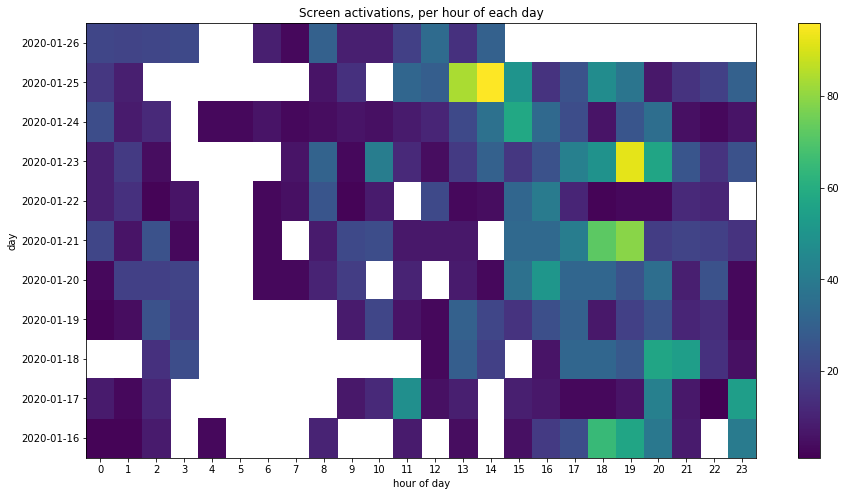

In [18]:
%matplotlib inline
# NOTE: this plots all rows, not only the "unlock" events.
df = hourly.pivot('day', 'hour', 'count')
plt.figure(figsize=(15, 8))
# from https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
plt.pcolor(df)
plt.title('Screen activations, per hour of each day')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.xlabel('hour of day')
plt.ylabel('day')
plt.colorbar()

In [12]:
#%matplotlib widget
#from matplotlib import pyplot as plt
#data['y'] = data.screen_status
#data.plot('datetime', 'y', rot=45)

In [13]:
data["2020-01-10 06:00":].head(25)

,user,device,time,screen_status,datetime
2020-01-16 00:57:18.109999895+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,1,2020-01-16 00:57:18.109999895+02:00
2020-01-16 00:57:27.542999983+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,3,2020-01-16 00:57:27.542999983+02:00
2020-01-16 01:01:36.096999884+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,0,2020-01-16 01:01:36.096999884+02:00
2020-01-16 01:01:36.107000113+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579129e+09,2,2020-01-16 01:01:36.107000113+02:00
2020-01-16 02:18:06.082999945+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579134e+09,1,2020-01-16 02:18:06.082999945+02:00
2020-01-16 02:18:11.624000072+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579134e+09,0,2020-01-16 02:18:11.624000072+02:00
2020-01-16 02:18:11.638000011+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579134e+09,2,2020-01-16 02:18:11.638000011+02:00
2020-01-16 02:41:32.240999937+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579135e+09,1,2020-01-16 02:41:32.240999937+02:00
2020-01-16 02:41:35.829999924+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579135e+09,3,2020-01-16 02:41:35.829999924+02:00
2020-01-16 02:42:27.055000067+02:00,xJByY57Ph7pU,iWpmbvTcAsNv,1.579135e+09,0,2020-01-16 02:42:27.055000067+02:00


In [14]:
#unlocks = data[data['screen_status'] == '3'].copy()
#unlocks['hour'] = unlocks.index.hour
#unlocks['date'] = unlocks.index.strftime('%Y-%m-%d')
#unlocks.groupby([''])
#unlocks.head()
#unlocks[['date', 'hour', 'screen_status']].groupby(['date', 'hour']).count()
#unlocks.pivot('date', 'hour', 'screen_status')
